## 库引入

In [1]:
from ginkgo.data.ginkgo_data import GDATA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import numpy as np
import time
from tqdm.notebook import tqdm

## 数据准备

In [2]:
stock_list = GDATA.get_stock_info_df()
# stock_list = stock_list[:200] # For Test
print(stock_list.columns)
print(stock_list['code'].head(5))

Index(['uuid', 'desc', 'timestamp', 'create', 'update', 'isdel', 'source',
       'code', 'code_name', 'industry', 'currency', 'list_date',
       'delist_date'],
      dtype='object')
1    000001.SZ
2    000002.SZ
3    000004.SZ
4    000005.SZ
5    000006.SZ
Name: code, dtype: object


In [3]:
years = list(range(1995, 2024))
years = years[:2] # For Test
print(years)

[1995, 1996]


In [4]:
decimal_category = list(range(0,10))
print("小数点首位")
print(decimal_category)

小数点首位
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
change_category = list(range(-10,11))
print("变化率边界")
print(change_category)

变化率边界
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
def get_raw_data(date_start, date_end, n): 
    pd.set_option('display.max_rows', None)
    data = pd.DataFrame()
    with tqdm(total=len(stock_list)) as pbar:
        for i, r in stock_list.iterrows():
            code = r.code
            pbar.set_description(f"{code} Query")
            df = GDATA.get_daybar_df(code=code, date_start=date_start, date_end=date_end)
            pbar.set_description(f"{code} Baken")
            df.drop(columns=['uuid', 'desc', 'source', 'frequency', 'update', 'create', 'isdel'], inplace=True)
            df['chg_tmp'] = (df['close'] - df['open']) / df['open'] * 100
            df['chg_tmp'] = df['chg_tmp'].round(2)
            df['category'] = df['close'].apply(lambda x: int(str(x).split('.')[1][0]))
            df['chg'] = df['chg_tmp'].shift(-n)
            df = df[df['chg']< (100 * (1.1 ** n) - 100)]
            df = df[df['chg']>-(100 * (1.1 ** n) - 100)]
            df.dropna(inplace=True)
            data = pd.concat([data, df], ignore_index=True)
            # data.drop(columns=['open','high','low','volume','chg_tmp'], inplace=True)
            # data.drop(columns=['chg_tmp'], inplace=True)
            # data.drop(columns=['code'], inplace=True)
            pbar.update(1)
    return data

In [7]:
observe_window = 2

In [8]:
data = get_raw_data('1995-01-01','1996-01-01',observe_window)

  0%|          | 0/5380 [00:00<?, ?it/s]

## 数据基本情况

In [9]:
print("Shape: ",data.shape)
print(data.head(2))
print(data['chg'].describe())

Shape:  (60762, 10)
   timestamp       code   open   high    low  close volume  chg_tmp category  \
0 1995-01-03  000001.SZ  10.50  10.76  10.21  10.72   7497      2.1        7   
1 1995-01-04  000001.SZ  10.72  11.18  10.50  11.16  17496      4.1        1   

    chg  
0 -0.71  
1  1.00  
count    60762.000000
mean        -0.044534
std          2.774761
min        -20.710000
25%         -1.450000
50%         -0.140000
75%          1.130000
max         20.970000
Name: chg, dtype: float64


## 分组情况

Category: 0
count    6715.000000
mean       -0.137168
std         2.805771
min       -20.710000
25%        -1.500000
50%        -0.220000
75%         1.010000
max        20.970000
Name: chg, dtype: float64


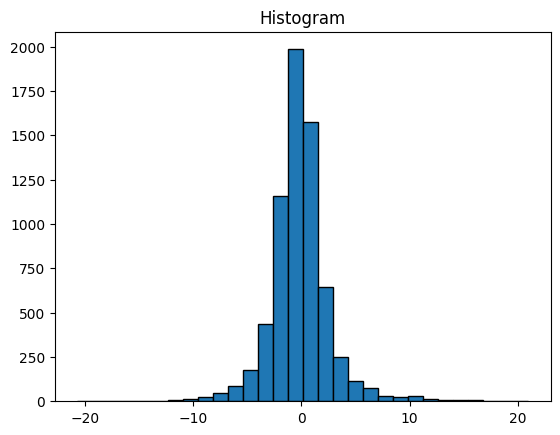

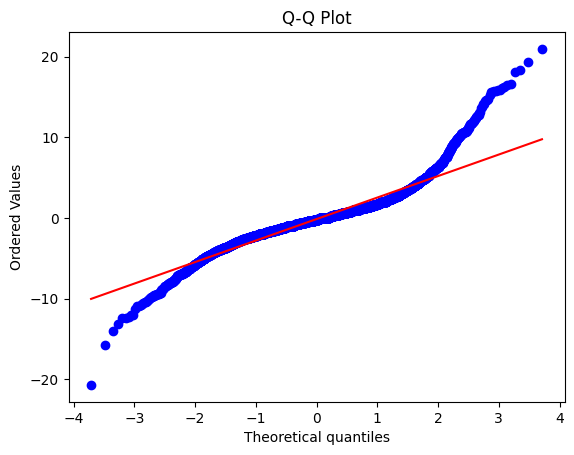

Category: 1
count    6324.000000
mean       -0.032990
std         2.733994
min       -19.300000
25%        -1.380000
50%        -0.070000
75%         1.140000
max        19.850000
Name: chg, dtype: float64


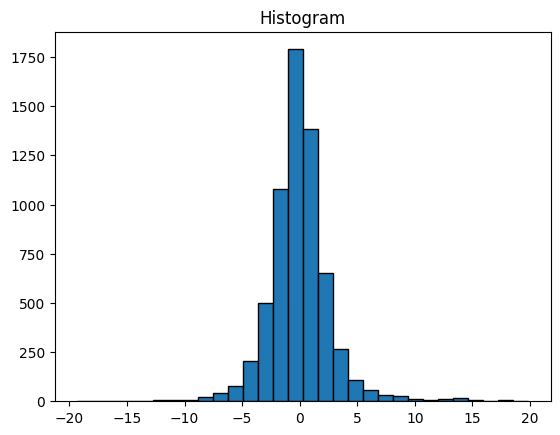

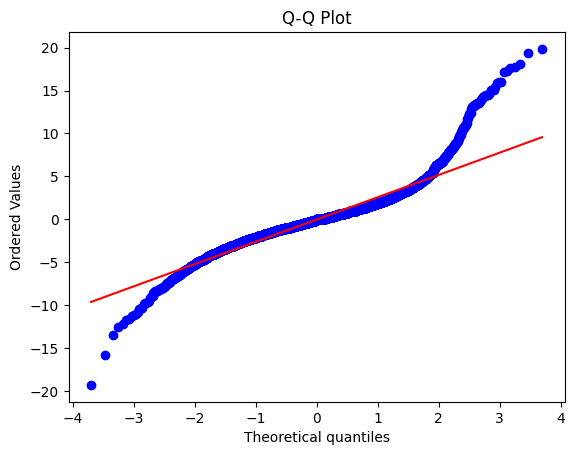

Category: 2
count    5986.000000
mean       -0.113812
std         2.781320
min       -15.690000
25%        -1.490000
50%        -0.190000
75%         1.140000
max        20.950000
Name: chg, dtype: float64


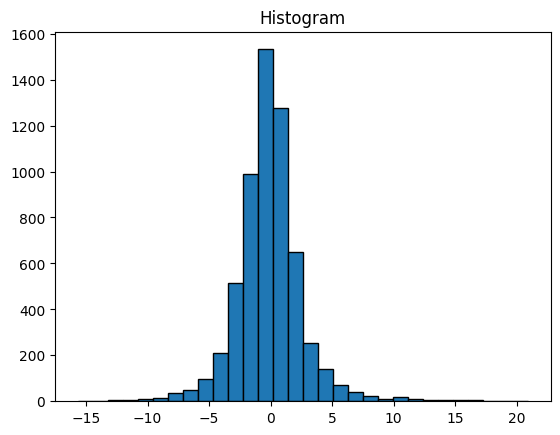

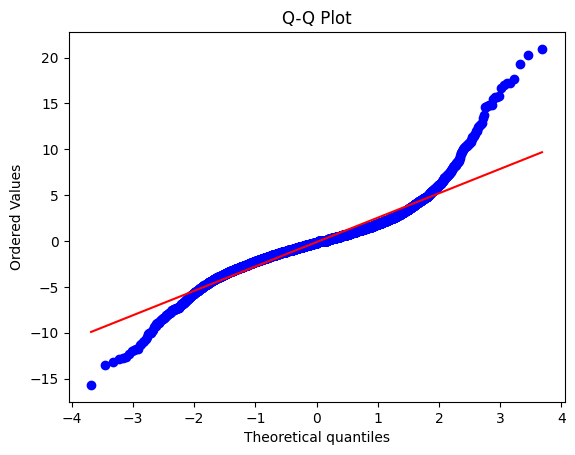

Category: 3
count    5856.000000
mean        0.029698
std         2.836189
min       -17.120000
25%        -1.460000
50%         0.000000
75%         1.162500
max        20.450000
Name: chg, dtype: float64


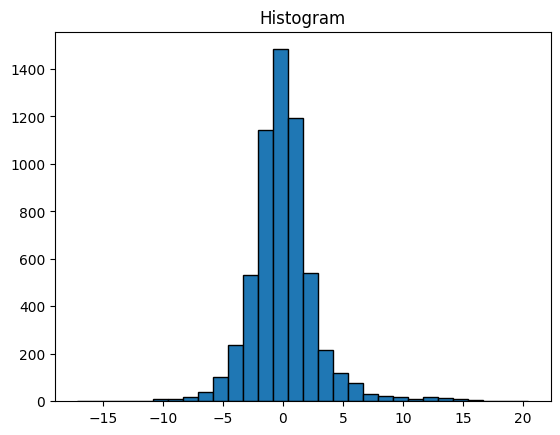

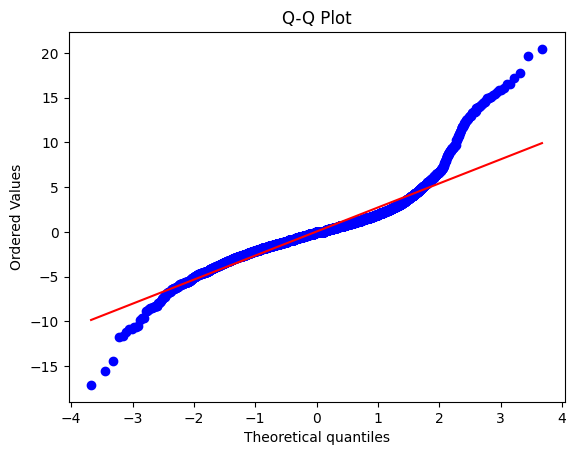

Category: 4
count    5497.000000
mean        0.082732
std         2.949029
min       -16.120000
25%        -1.410000
50%         0.000000
75%         1.240000
max        20.120000
Name: chg, dtype: float64


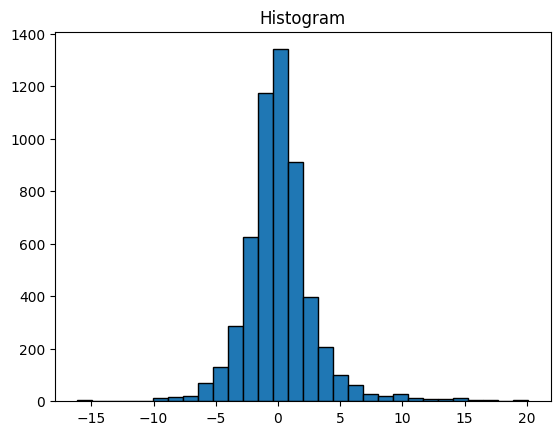

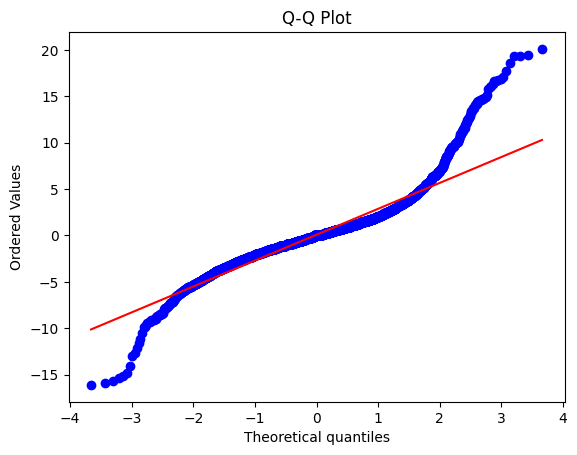

Category: 5
count    5856.000000
mean       -0.026730
std         2.818586
min       -18.440000
25%        -1.472500
50%        -0.140000
75%         1.180000
max        20.450000
Name: chg, dtype: float64


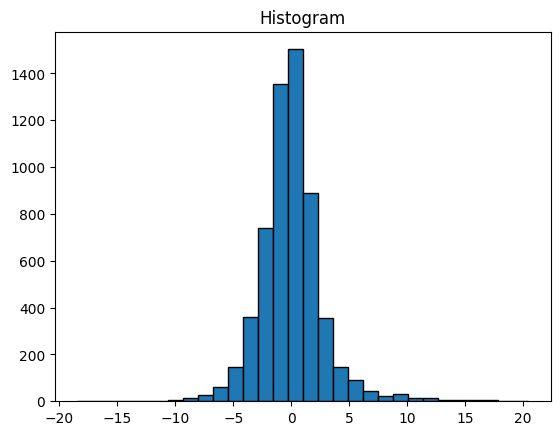

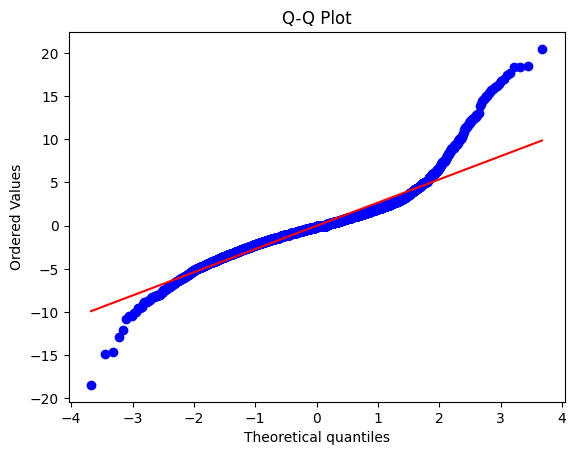

Category: 6
count    5985.000000
mean       -0.032628
std         2.746827
min       -17.140000
25%        -1.440000
50%        -0.120000
75%         1.180000
max        18.880000
Name: chg, dtype: float64


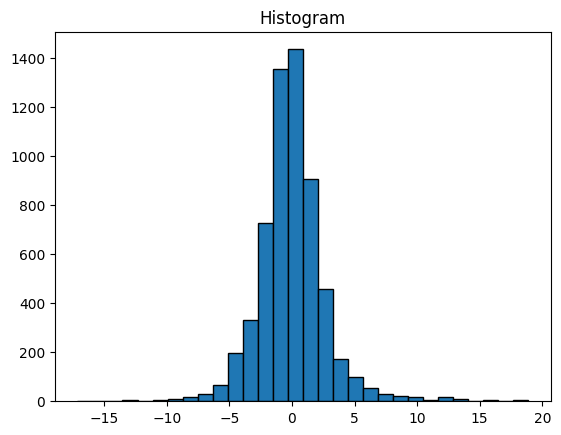

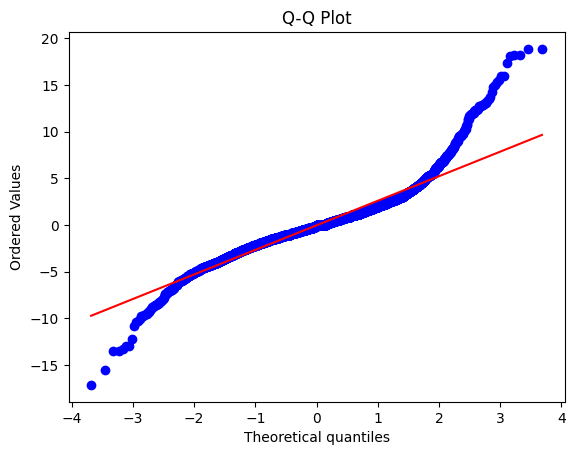

Category: 7
count    6133.000000
mean       -0.056349
std         2.681597
min       -19.780000
25%        -1.440000
50%        -0.150000
75%         1.090000
max        20.910000
Name: chg, dtype: float64


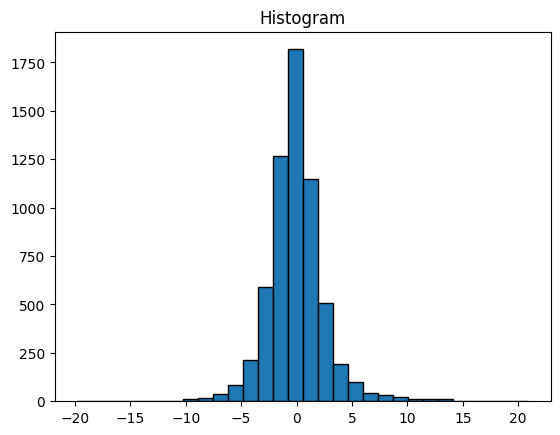

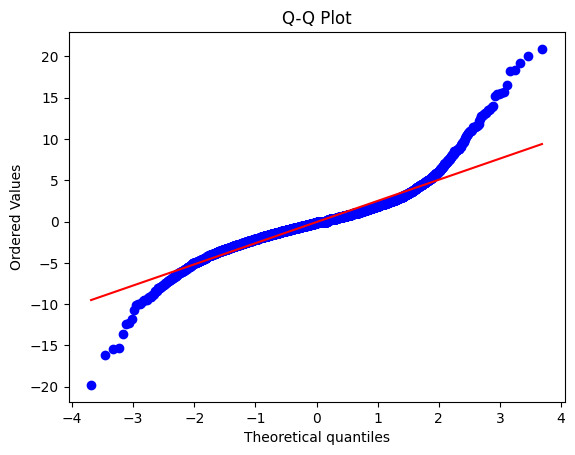

Category: 8
count    6431.000000
mean       -0.022482
std         2.751939
min       -16.670000
25%        -1.420000
50%        -0.110000
75%         1.070000
max        20.000000
Name: chg, dtype: float64


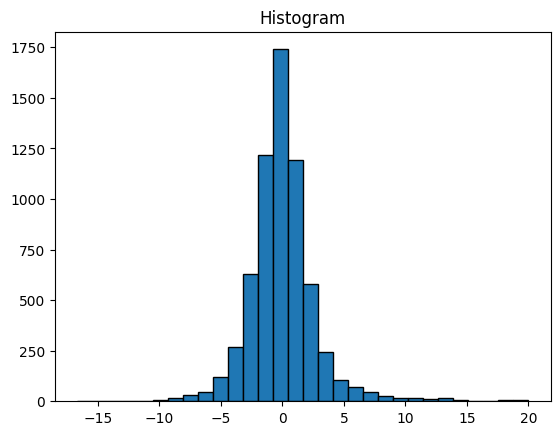

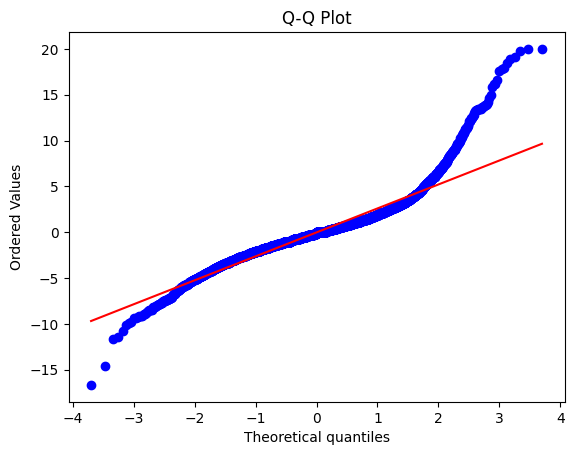

Category: 9
count    5979.000000
mean       -0.114014
std         2.644535
min       -14.080000
25%        -1.455000
50%        -0.250000
75%         1.050000
max        19.680000
Name: chg, dtype: float64


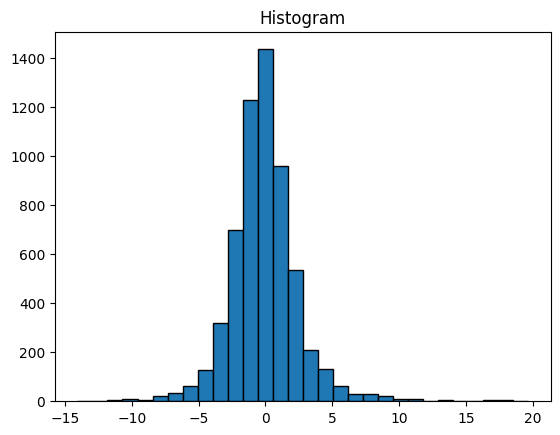

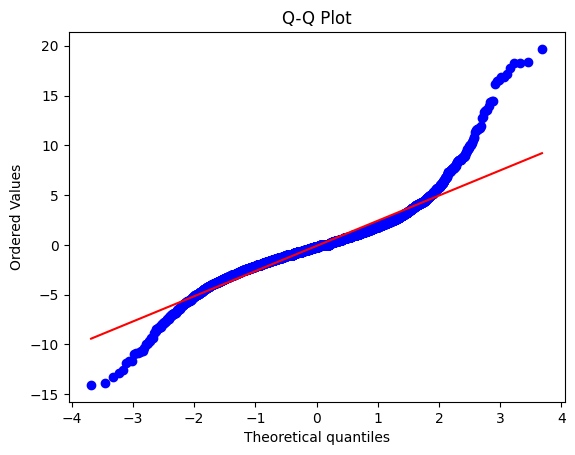

In [10]:
# 按照小数点第一位分组
group = data.groupby(data['category'])

for name, gdata in group:
    print(f"Category: {name}")
    print(gdata['chg'].describe())
    plt.hist(gdata['chg'], bins=30, edgecolor='black')
    plt.title('Histogram')
    plt.show()
    stats.probplot(gdata['chg'], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

### 按照小数点第一位分组

In [11]:
groups = [g['chg'].values for name, g in group]

## Levene 分析

In [12]:
levene_stat, levene_p = stats.levene(*groups)
print(f'Levene检验统计量: {levene_stat}, P值: {levene_p}')

Levene检验统计量: 2.9546454687845882, P值: 0.0016361521353984714


In [13]:
# 如果方差齐性检验通过（P值大于显著性水平，例如0.05），进行ANOVA
alpha = 0.01
if levene_p > alpha:
    anova_stat, anova_p = stats.f_oneway(*groups)
    print(f'单因素ANOVA检验统计量: {anova_stat}, P值: {anova_p}')

    # 根据P值判断是否拒绝原假设
    if anova_p < alpha:
        print(f"{(1-alpha)*100}%的把握拒绝原假设：不同类别的均值不同。")
        # 进行事后分析（例如Tukey HSD检验）以确定哪些组之间有显著差异
        data_melt = pd.melt(data, id_vars=['category'], value_vars=['future_1_day_change'])
        tukey = pairwise_tukeyhsd(endog=data_melt['value'], groups=data_melt['category'], alpha=alpha)
        print(tukey)
    else:
        print(f"{(1-alpha)*100}%的把握不拒绝原假设：不同类别的均值相同。")
else:
    print("方差齐性检验未通过，需考虑使用其他方法。")

方差齐性检验未通过，需考虑使用其他方法。


## Welch's ANOVA
Welch's ANOVA 是一种不需要方差齐性的单因素方差分析方法。它对方差不齐性的情况更为稳健

In [14]:
anova_stat, anova_p = stats.f_oneway(*groups, axis=0)
print(f"Welch s ANOVA检验统计量: {anova_stat}, P值: {anova_p}")

# 根据P值判断是否拒绝原假设
if anova_p < alpha:
    print(f"{(1-alpha)*100}%的把握拒绝原假设：不同类别的均值不同。")
else:
    print(f"{(1-alpha)*100}%的把握不拒绝原假设：不同类别的均值相同。")

Welch s ANOVA检验统计量: 3.5232435025912037, P值: 0.00022410889332299917
99.0%的把握拒绝原假设：不同类别的均值不同。


## Kruskal-Wallis 检验
Welch's ANOVA 是一种不需要方差齐性的单因素方差分析方法。它对方差不齐性的情况更为稳健

In [15]:
stat, p_value = stats.kruskal(*groups)
print(f'Kruskal-Wallis 检验统计量: {stat}, P值: {p_value}')

# 根据P值判断是否拒绝原假设
if p_value < alpha:
    print(f"{(1-alpha)*100}%的把握拒绝原假设：不同类别的分布不同。")
else:
    print(f"{(1-alpha)*100}%的把握不拒绝原假设：不同类别的分布相同。")

Kruskal-Wallis 检验统计量: 26.78747085757684, P值: 0.0015165623405112407
99.0%的把握拒绝原假设：不同类别的分布不同。


## 事后分析

### Tukey's HSD (Honestly Significant Difference) 检验
Tukey's HSD 检验是常用的一种事后分析方法，用于比较多个组之间的均值差异

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data['chg'], groups=data['category'], alpha=alpha)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1042 0.4968 -0.0731  0.2814  False
     0      2   0.0234    1.0 -0.1565  0.2032  False
     0      3   0.1669 0.0266  -0.014  0.3477  False
     0      4   0.2199 0.0006  0.0359  0.4039   True
     0      5   0.1104 0.4384 -0.0704  0.2913  False
     0      6   0.1045 0.5133 -0.0753  0.2844  False
     0      7   0.0808 0.8236 -0.0979  0.2595  False
     0      8   0.1147 0.3444 -0.0618  0.2912  False
     0      9   0.0232    1.0 -0.1567   0.203  False
     1      2  -0.0808  0.841 -0.2632  0.1016  False
     1      3   0.0627 0.9649 -0.1208  0.2462  False
     1      4   0.1157 0.4141 -0.0708  0.3023  False
     1      5   0.0063    1.0 -0.1772  0.1897  False
     1      6   0.0004    1.0 -0.1821  0.1828  False
     1      7  -0.0234    1.0 -0.2047  0.1579  False
     1      8   0.0105    1.0 -0.1686  0.1897 

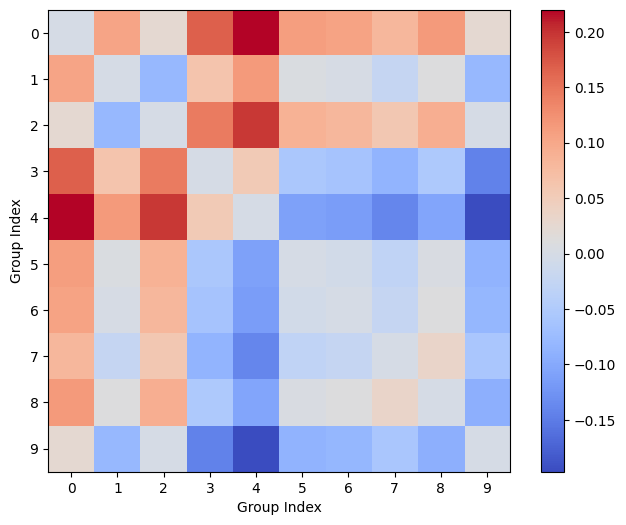

In [17]:
# 创建一个 10x10 的零矩阵
meandiff_matrix = np.zeros((10, 10))

# 将一维数组填充到矩阵中
k = 0
for i in range(10):
    for j in range(i + 1, 10):
        meandiff_matrix[i, j] = tukey.meandiffs[k]
        meandiff_matrix[j, i] = tukey.meandiffs[k]  # 对称填充
        k += 1

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(meandiff_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # 添加颜色条
plt.xlabel('Group Index')
plt.ylabel('Group Index')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.grid(False)
plt.show()